# problem statement
 ## we have a website named bikewale and we have to collect the used bikes data and analize that
    - which brand having more options to buy a used bike in india.
    - How the price varies with several spcifications  and suggest a good bike according to budget.

# Data Collection

## Importing required  libraries

In [2]:
import requests 
from bs4 import BeautifulSoup 
import re
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Collecting the data from website

In [46]:
list_urls=['bangalore','mumbai','nagpur','bhopal','indore','kalyan','hyderabad','delhi','pune','navi mumbai','visakhapatnam','chennai','coimbatore','madurai','chandigarh','bhubaneswar','noida','allahabad','surat',
          'gurgaon','varanasi','dehradun','faridabad','nashik','thane','mysore','aurangabad','kolkata','patna','lucknow','agra','ghaziabad','ludhiana','vijaywada','jamshedpur','kolhapur','kochi','greater noida','vadadara',
          'ahmedabad','jaipur','jodhpur','guwahati','mohali']
companyname=[]
kms=[]
location=[]
price=[]
owner=[]
update=[]
year=[]
modelname=[]
for i in list_urls:
    url="https://www.bikewale.com/used/bikes-in-"+i+'/'
    #print(url)
    page=requests.get(url)
    soup=BeautifulSoup(page.content)
    
    
    # To get the names
    b=soup.find_all("a",class_="text-truncate text-black")
    for i in b:
        x=i.text.split(',')[1]
        if "Royal Enfield" in x:
            companyname.append(x.split()[0:2])
            modelname.append(x.split()[2:])
        else:
            companyname.append(x.split()[0:1])
            modelname.append(x.split()[1:])
            
    # to get the kms and location
    s=soup.find_all('div',class_="grid-6 alpha omega")
    for i in range(0,len(s)):
        if (i%2==1):
            location.append(s[i].text)
        else:
            kms.append(s[i].text)
            
    # to get the price
    for g in soup.find_all('span',class_="font22 text-bold"):
        price.append(g.text)
        
    # to get the update
    for e in soup.find_all('div',class_="margin-bottom5"):
        update.append(e.text)
         
    # to get the owner and year
    s=soup.find_all('div',class_="grid-6 alpha")
    for i in range(0,len(s)):
        if (i%2==1):
            owner.append(s[i].text)
        else:
            year.append(s[i].text)
            
# converting the lists into string
modelname = [''.join(ele) for ele in modelname]
companyname = [''.join(ele) for ele in companyname]
while('' in update):
    update.remove('')

## creating a data frame

In [49]:
bike=pd.DataFrame({'Location':location,'Brand':companyname,"Modelname":modelname,'Type_Owner':owner,
                   'KMs_driven':kms,'year':year,'Price_in_rupees':price,"PostedOn":update})
bike

,Location,Brand,Modelname,Type_Owner,KMs_driven,year,Price_in_rupees,PostedOn
0,Bangalore,Yamaha,YZFR15[2011-2018]V2.0,1st Owner,"38,000 kms",2016 model,"1,15,000",Updated on: 25 January 2023
1,Bangalore,Bajaj,Pulsar220DTS-iStandard,1st Owner,"34,000 kms",2011 model,"50,000",Updated on: 25 January 2023
2,Bangalore,RoyalEnfield,Thunderbird350Disc,1st Owner,"33,000 kms",2015 model,"1,10,000",Updated on: 23 January 2023
3,Bangalore,Hero,MaestroEdge110VX,2nd Owner,"7,200 kms",2019 model,"54,000",Updated on: 23 January 2023
4,Bangalore,RoyalEnfield,Thunderbird350XStandard,1st Owner,"18,000 kms",2018 model,"1,35,000",Updated on: 23 January 2023
...,...,...,...,...,...,...,...,...
627,Mohali,RoyalEnfield,Bullet350Twinspark,1st Owner,"40,000 kms",2011 model,"70,000",Updated on: 20 November 2022
628,Mohali,Honda,CBTwisterDisc/Electricstart,3rd Owner,"27,000 kms",2012 model,"25,000",Updated on: 17 November 2022
629,Mohali,TVS,ApacheRR310SlipperClutch,1st Owner,"16,000 kms",2019 model,"1,80,000",Updated on: 10 November 2022
630,Mohali,Yamaha,FZSFISingleChannelABS,1st Owner,"11,000 kms",2020 model,"1,05,000",Updated on: 03 November 2022


## converting the dataframe into csv file

In [50]:
bike.to_csv('bike.csv')

In [3]:
bike_data=pd.read_csv(r"C:\Users\sreya\Data Science course\Assignments\bike.csv")

In [4]:
bike_data.head()

,Unnamed: 0,Location,Brand,Modelname,Type_Owner,KMs_driven,year,Price_in_rupees,PostedOn
0,0,Bangalore,Yamaha,YZFR15[2011-2018]V2.0,1st Owner,"38,000 kms",2016 model,"1,15,000",Updated on: 25 January 2023
1,1,Bangalore,Bajaj,Pulsar220DTS-iStandard,1st Owner,"34,000 kms",2011 model,"50,000",Updated on: 25 January 2023
2,2,Bangalore,RoyalEnfield,Thunderbird350Disc,1st Owner,"33,000 kms",2015 model,"1,10,000",Updated on: 23 January 2023
3,3,Bangalore,Hero,MaestroEdge110VX,2nd Owner,"7,200 kms",2019 model,"54,000",Updated on: 23 January 2023
4,4,Bangalore,RoyalEnfield,Thunderbird350XStandard,1st Owner,"18,000 kms",2018 model,"1,35,000",Updated on: 23 January 2023


## Cleaning the data

In [5]:
# Deleting the unnamed column
bike_data=bike_data.drop(['Unnamed: 0'],axis=1)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Location         632 non-null    object
 1   Brand            632 non-null    object
 2   Modelname        632 non-null    object
 3   Type_Owner       632 non-null    object
 4   KMs_driven       632 non-null    object
 5   year             632 non-null    object
 6   Price_in_rupees  632 non-null    object
 7   PostedOn         632 non-null    object
dtypes: object(8)
memory usage: 39.6+ KB


### Deleting unused things

In [6]:
bike_data['Price_in_rupees'] = list(map(lambda x:x.replace(",",""),bike_data['Price_in_rupees']))
bike_data['KMs_driven'] = list(map(lambda x:x.replace(",",""),bike_data['KMs_driven']))
bike_data['Type_Owner'] = list(map(lambda x:x.replace("Owner",""),bike_data["Type_Owner"]))


In [7]:
bike_data['KMs_driven'] = list(map(lambda x:x.replace("kms",""),bike_data['KMs_driven']))
bike_data['year'] = list(map(lambda x:x.replace("model",""),bike_data['year']))
bike_data['PostedOn'] = list(map(lambda x:x.replace("Updated on:",""),bike_data['PostedOn']))


### converting to appropriate datatype

In [8]:
bike_data["KMs_driven"]=bike_data["KMs_driven"].astype("int")
bike_data['Price_in_rupees'] = bike_data["Price_in_rupees"].astype("int")
bike_data['year'] = bike_data["year"].astype("int")
bike_data['PostedOn'] = bike_data["PostedOn"].astype("datetime64[ns]")


In [9]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Location         632 non-null    object        
 1   Brand            632 non-null    object        
 2   Modelname        632 non-null    object        
 3   Type_Owner       632 non-null    object        
 4   KMs_driven       632 non-null    int32         
 5   year             632 non-null    int32         
 6   Price_in_rupees  632 non-null    int32         
 7   PostedOn         632 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(3), object(4)
memory usage: 32.2+ KB


C:\Users\sreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KMs_driven'>

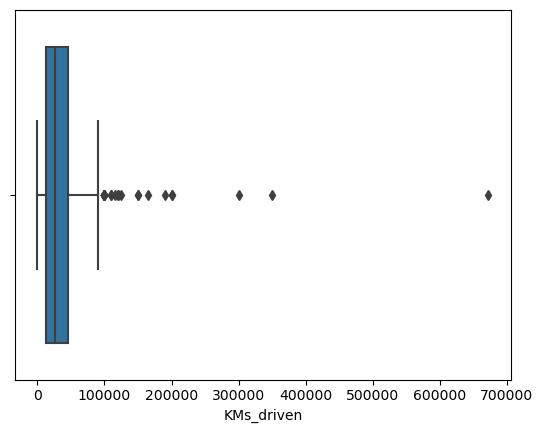

In [96]:
sns.boxplot(bike_data['KMs_driven'])

In [10]:
bike_data.head()

,Location,Brand,Modelname,Type_Owner,KMs_driven,year,Price_in_rupees,PostedOn
0,Bangalore,Yamaha,YZFR15[2011-2018]V2.0,1st,38000,2016,115000,2023-01-25
1,Bangalore,Bajaj,Pulsar220DTS-iStandard,1st,34000,2011,50000,2023-01-25
2,Bangalore,RoyalEnfield,Thunderbird350Disc,1st,33000,2015,110000,2023-01-23
3,Bangalore,Hero,MaestroEdge110VX,2nd,7200,2019,54000,2023-01-23
4,Bangalore,RoyalEnfield,Thunderbird350XStandard,1st,18000,2018,135000,2023-01-23


In [71]:
bike_data.isnull().sum()
# there is no null value present in the dataframe

Location           0
Brand              0
Modelname          0
Type_Owner         0
KMs_driven         0
year               0
Price_in_rupees    0
PostedOn           0
dtype: int64

In [72]:
bike_data.describe()

,KMs_driven,year,Price_in_rupees
count,632.000000,632.000000,6.320000e+02
mean,34595.922468,2015.827532,8.429983e+04
std,40877.747015,4.791402,8.720881e+04
min,55.000000,1983.000000,7.000000e+03
25%,12500.000000,2013.000000,3.500000e+04
50%,27000.000000,2017.000000,6.000000e+04
75%,45000.000000,2019.000000,1.050000e+05
max,672220.000000,2022.000000,1.200000e+06


# Data Visualization and Data Analysis
## Univariate Analysis

<AxesSubplot:xlabel='year'>

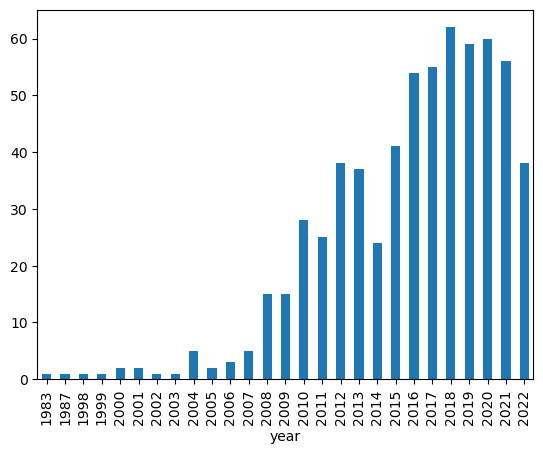

In [46]:
bike_data.groupby('year').size().plot(kind='bar')

### Observation
    - Here we can observe that 2018 model bikes are maximum count compare to another bike models

<AxesSubplot:xlabel='Price_in_rupees', ylabel='Count'>

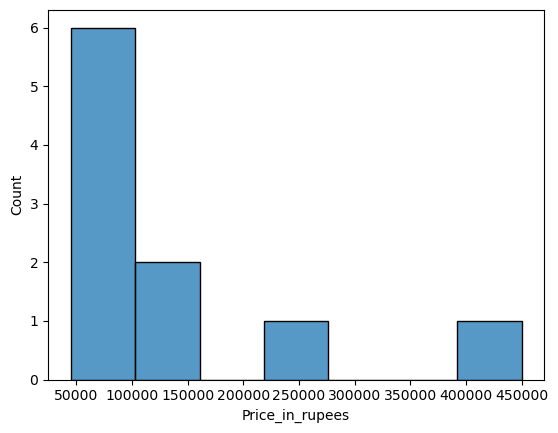

In [90]:
sns.histplot(bike_data['Price_in_rupees'][30:40])

### observation
    - Here we can say that most of the bike price is less than 60000 and greater than 120000

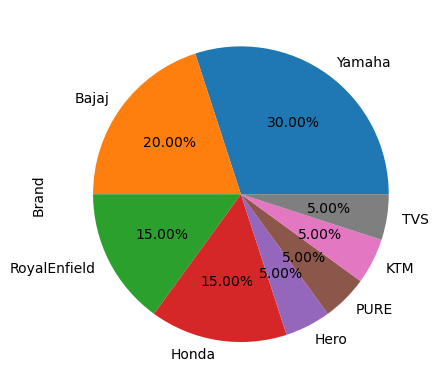

In [76]:
bike_data['Brand'][0:20].value_counts().plot.pie(autopct="%.2f%%")
plt.show()

### Observation
    - Here we can say that the number of yamaha bikes are much higher than the other brands.

C:\Users\sreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


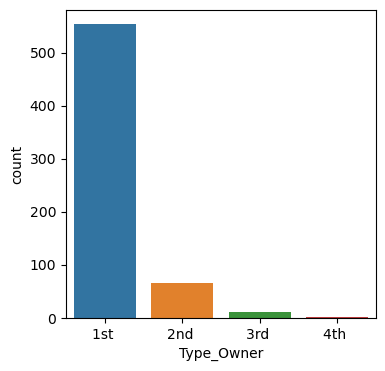

In [89]:
plt.figure(figsize=(4,4))
sns.countplot(bike_data['Type_Owner'])
plt.show()

### Observation
    -Here we can obvsevre that the 1st owner count is high compare to the another owners

<AxesSubplot:>

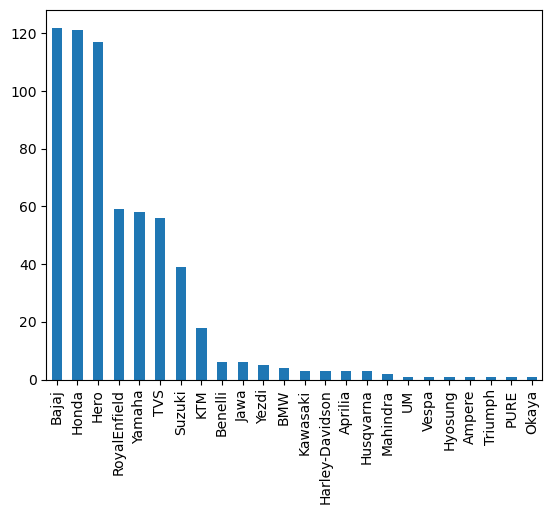

In [91]:
bike_data['Brand'].value_counts().plot(kind='bar')

### Observation
    - Here we can say that we are having most number of  bikes of bajaj ,honda and hero brand as compare to other brand.

## Bi-variate Analysis
### Numerical-Numerical

<AxesSubplot:xlabel='year', ylabel='Price_in_rupees'>

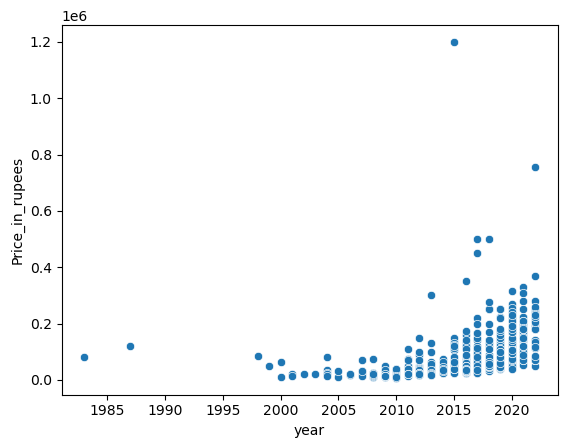

In [26]:
sns.scatterplot(x=bike_data['year'],y=bike_data['Price_in_rupees'],data=bike_data)

### Observation
    - Here we can observe that if the model year increases price also increases.

## Numerical-Catagorical

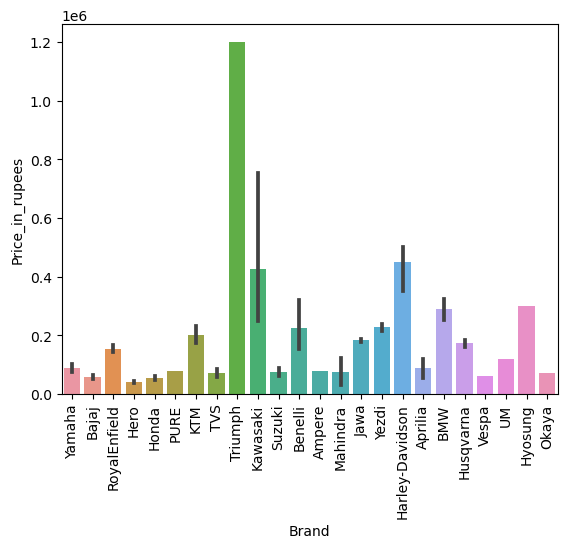

In [28]:
sns.barplot(x=bike_data['Brand'],y=bike_data['Price_in_rupees'],data=bike_data)
plt.xticks(rotation=90)
plt.show()

### observation
    - Here we can observe that Triumph bikes price is higher than the other brands.

<AxesSubplot:xlabel='Type_Owner', ylabel='KMs_driven'>

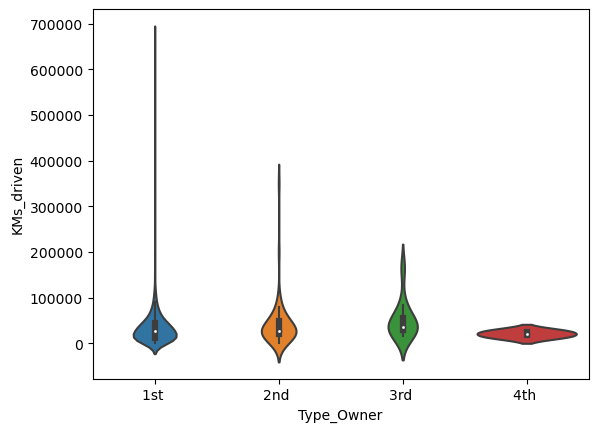

In [24]:
sns.violinplot(x=bike_data['Type_Owner'],y=bike_data['KMs_driven'])

### Observation
    - Here we can observe 4th owner bikes are more driven under 100000 km than others

## Catagorical-Catagorical

In [41]:
crosstab=pd.crosstab(bike_data['Location'],bike_data["Type_Owner"])
crosstab

Type_Owner,1st,2nd,3rd,4th
Location,,,,
Agra,9,0,0,0
Ahmedabad,17,1,1,1
Allahabad,7,0,0,0
Aurangabad,14,1,0,0
Bangalore,19,1,0,0
Bhopal,8,0,1,0
Bhubaneswar,18,2,0,0
Chandigarh,9,1,0,0
Chennai,17,3,0,0


<AxesSubplot:xlabel='Location'>

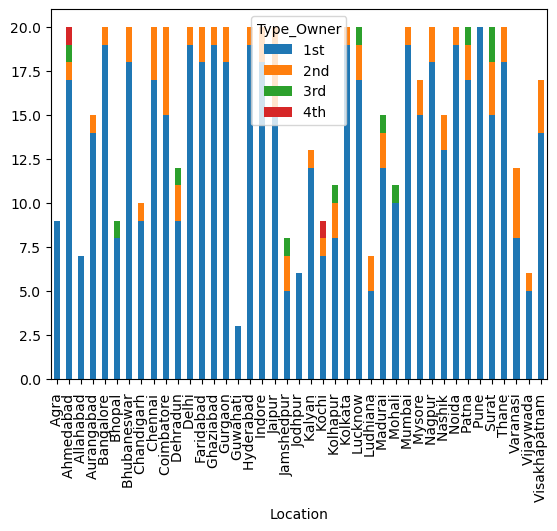

In [44]:
crosstab.plot(kind="bar",stacked=True)

### Obsevation
    - Here we can observe that most of the cities having 1st owner bike as compare to other owner

## Multi variate analysis

In [47]:
x=bike_data.select_dtypes(include='number')
x

,KMs_driven,year,Price_in_rupees
0,38000,2016,115000
1,34000,2011,50000
2,33000,2015,110000
3,7200,2019,54000
4,18000,2018,135000
...,...,...,...
627,40000,2011,70000
628,27000,2012,25000
629,16000,2019,180000
630,11000,2020,105000


<AxesSubplot:>

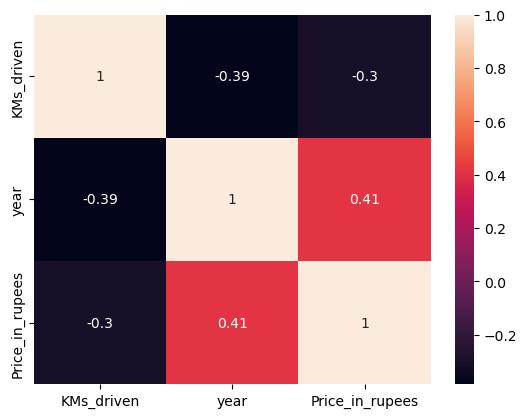

In [48]:
sns.heatmap(x.corr(),annot=True)

### Observation
    - Here we can observe that modelyear and price has positive correlation means if model year is increased then price is also increased
    - here total kms and price having correlation if total kms decreases price increases

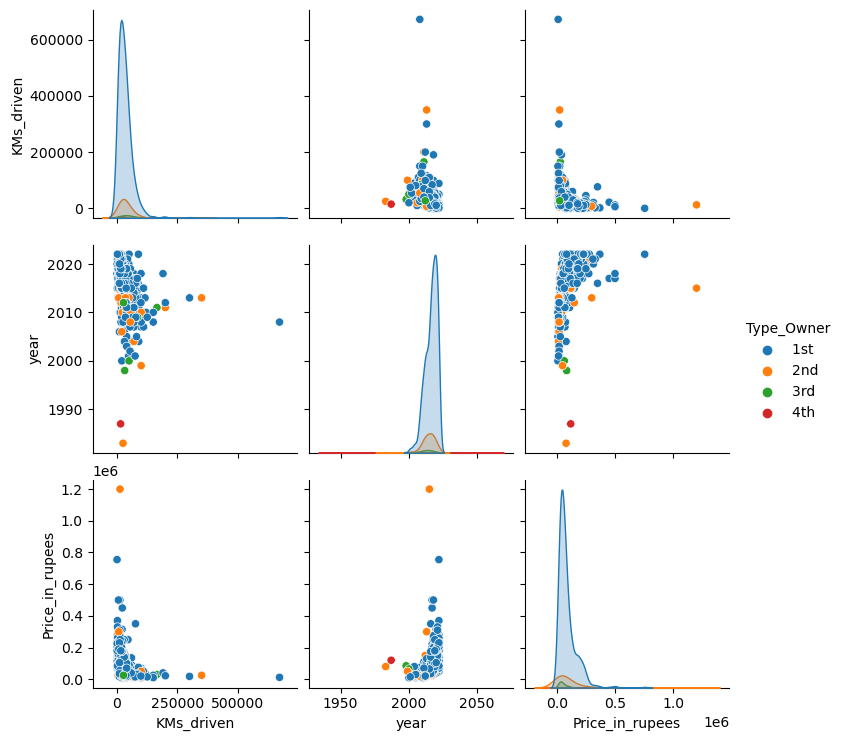

In [50]:
sns.pairplot(data=bike_data,hue='Type_Owner')


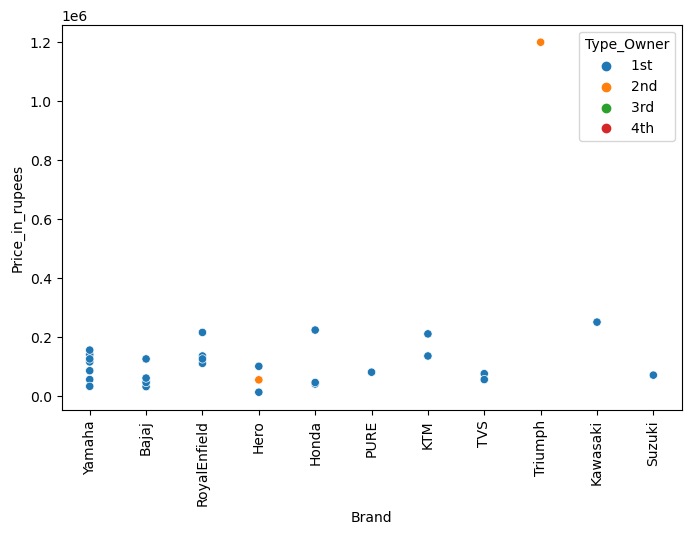

In [58]:
plt.figure(figsize=[8,5])
sns.scatterplot(x=bike_data['Brand'],y=bike_data['Price_in_rupees'],hue='Type_Owner',data=bike_data)
plt.xticks(rotation=90)
plt.show()


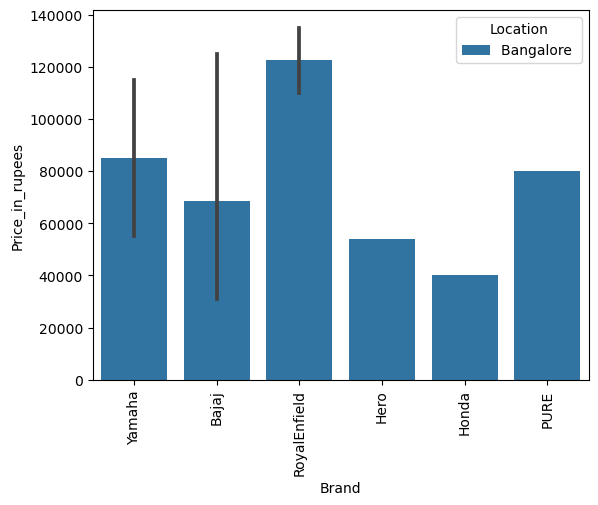

In [68]:
sns.barplot(x=bike_data['Brand'][0:10],y=bike_data['Price_in_rupees'],hue=bike_data['Location'][0:10],data=bike_data)
plt.xticks(rotation=90)
plt.show()

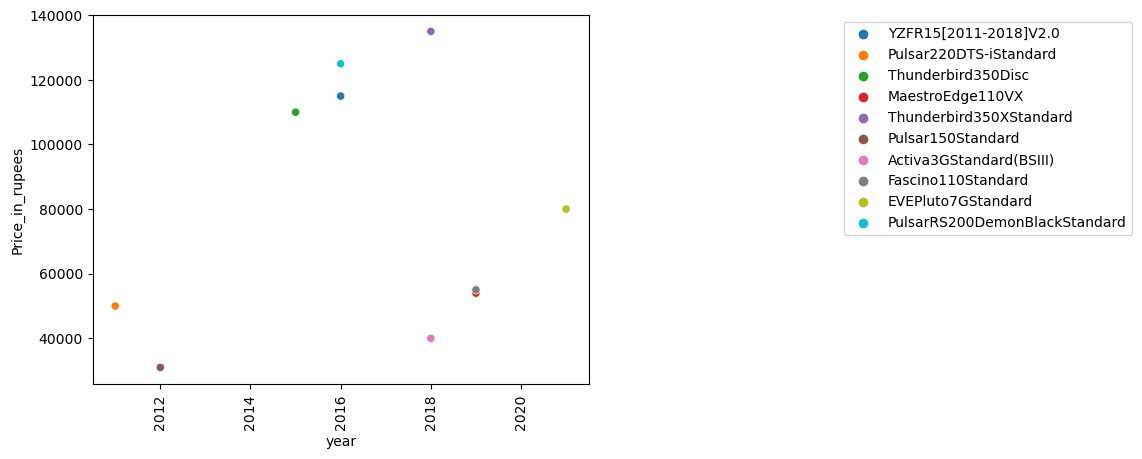

In [72]:
sns.scatterplot(x=bike_data['year'][0:30],y=bike_data['Price_in_rupees'],hue=bike_data['Modelname'][0:10],data=bike_data)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

In [77]:
bike_data


,Location,Brand,Modelname,Type_Owner,KMs_driven,year,Price_in_rupees,PostedOn
0,Bangalore,Yamaha,YZFR15[2011-2018]V2.0,1st,38000,2016,115000,2023-01-25
1,Bangalore,Bajaj,Pulsar220DTS-iStandard,1st,34000,2011,50000,2023-01-25
2,Bangalore,RoyalEnfield,Thunderbird350Disc,1st,33000,2015,110000,2023-01-23
3,Bangalore,Hero,MaestroEdge110VX,2nd,7200,2019,54000,2023-01-23
4,Bangalore,RoyalEnfield,Thunderbird350XStandard,1st,18000,2018,135000,2023-01-23
...,...,...,...,...,...,...,...,...
627,Mohali,RoyalEnfield,Bullet350Twinspark,1st,40000,2011,70000,2022-11-20
628,Mohali,Honda,CBTwisterDisc/Electricstart,3rd,27000,2012,25000,2022-11-17
629,Mohali,TVS,ApacheRR310SlipperClutch,1st,16000,2019,180000,2022-11-10
630,Mohali,Yamaha,FZSFISingleChannelABS,1st,11000,2020,105000,2022-11-03


In [84]:
len(bike_data["Brand"].unique())

24

In [86]:
bike_data["Price_in_rupees"].max()

1200000